# Importing Libraries

In [566]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.pipeline import Pipeline

# Reading Data

In [567]:
Credit_Data=pd.read_csv(r'F://Pratik//COVID Janata Hack\train_20D8GL3.csv')

In [568]:
Credit_Data_Test=pd.read_csv(r'F://Pratik//COVID Janata Hack\test_O6kKpvt.csv')

# EDA

In [569]:
Credit_Data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [570]:
Credit_Data_Test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [571]:
Credit_Data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0
20999,18049,90000,1,3,1,44,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [572]:
Credit_Data_Test.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,...,7956,499,0,5990,1950,7956,499,0,5990,0
8997,24002,60000,1,2,2,26,0,0,0,0,...,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120
8998,17019,70000,2,2,2,23,0,0,0,0,...,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700
8999,23415,600000,2,2,1,38,1,2,2,2,...,39635,35130,33229,32171,0,4000,0,1500,2000,3000


In [573]:
Credit_Data.shape

(21000, 25)

In [574]:
Credit_Data_Test.shape

(9000, 24)

In [575]:
Credit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
ID                            21000 non-null int64
LIMIT_BAL                     21000 non-null int64
SEX                           21000 non-null int64
EDUCATION                     21000 non-null int64
MARRIAGE                      21000 non-null int64
AGE                           21000 non-null int64
PAY_0                         21000 non-null int64
PAY_2                         21000 non-null int64
PAY_3                         21000 non-null int64
PAY_4                         21000 non-null int64
PAY_5                         21000 non-null int64
PAY_6                         21000 non-null int64
BILL_AMT1                     21000 non-null int64
BILL_AMT2                     21000 non-null int64
BILL_AMT3                     21000 non-null int64
BILL_AMT4                     21000 non-null int64
BILL_AMT5                     21000 non-null int64
BILL_AMT6               

In [576]:
Credit_Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
ID           9000 non-null int64
LIMIT_BAL    9000 non-null int64
SEX          9000 non-null int64
EDUCATION    9000 non-null int64
MARRIAGE     9000 non-null int64
AGE          9000 non-null int64
PAY_0        9000 non-null int64
PAY_2        9000 non-null int64
PAY_3        9000 non-null int64
PAY_4        9000 non-null int64
PAY_5        9000 non-null int64
PAY_6        9000 non-null int64
BILL_AMT1    9000 non-null int64
BILL_AMT2    9000 non-null int64
BILL_AMT3    9000 non-null int64
BILL_AMT4    9000 non-null int64
BILL_AMT5    9000 non-null int64
BILL_AMT6    9000 non-null int64
PAY_AMT1     9000 non-null int64
PAY_AMT2     9000 non-null int64
PAY_AMT3     9000 non-null int64
PAY_AMT4     9000 non-null int64
PAY_AMT5     9000 non-null int64
PAY_AMT6     9000 non-null int64
dtypes: int64(24)
memory usage: 1.6 MB


In [577]:
Credit_Data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [578]:
Credit_Data_Test.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000
mean,15120.238111,168113.333333,1.594778,1.850667,1.552222,35.541222,-0.029556,-0.149000,-0.169333,-0.226444,...,46501.167889,42972.627444,40108.050667,38733.082000,5610.453222,5.916870e+03,5280.179222,4902.854889,4804.928556,5224.289444
std,8723.820188,131560.409674,0.490962,0.787395,0.523846,9.244435,1.125137,1.192971,1.192819,1.161984,...,68903.980549,64919.203875,61724.102415,60383.379063,15830.072097,2.087517e+04,18935.182165,16121.011036,15298.441141,17960.675353
min,13.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-17706.000000,-9415.000000,-28335.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7479.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2651.750000,2314.750000,1796.750000,1267.000000,1000.000000,8.200000e+02,396.000000,315.500000,289.500000,150.000000
50%,15126.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19791.500000,18803.000000,17781.500000,16715.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22739.500000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,58479.250000,52609.750000,49529.250000,48671.000000,5000.000000,5.000000e+03,4524.000000,4086.250000,4005.250000,4005.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,7.000000,...,855086.000000,891586.000000,927171.000000,961664.000000,505000.000000,1.024516e+06,896040.000000,528897.000000,426529.000000,527143.000000


In [579]:
Credit_Data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [580]:
Credit_Data_Test.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [581]:
Credit_Data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [582]:
Credit_Data_Test.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [583]:
Credit_Data.drop('ID',axis=1,inplace=True)

In [584]:
Credit_Data_Test.drop('ID',axis=1,inplace=True)

In [585]:
Credit_Data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.029683,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,...,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
SEX,0.029683,1.000000,0.011012,-0.033930,-0.092907,-0.061232,-0.072602,-0.064406,-0.061242,-0.055920,...,-0.017430,-0.014278,-0.013546,0.003907,0.000398,-0.003920,0.000042,0.002165,0.003759,-0.037634
EDUCATION,-0.216762,0.011012,1.000000,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,0.094702,...,0.002318,-0.005243,-0.006436,-0.042164,-0.032573,-0.045854,-0.041620,-0.035620,-0.031098,0.021347
MARRIAGE,-0.110451,-0.033930,-0.143085,1.000000,-0.414239,0.029420,0.032403,0.043988,0.042245,0.044779,...,-0.024648,-0.026143,-0.020930,-0.002227,-0.006634,0.000018,-0.014061,-0.003375,-0.005555,-0.016888
AGE,0.143206,-0.092907,0.172253,-0.414239,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,-0.061018,...,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
PAY_0,-0.272059,-0.061232,0.105815,0.029420,-0.043313,1.000000,0.669158,0.573421,0.540895,0.506958,...,0.175132,0.176809,0.172138,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851
PAY_2,-0.297323,-0.072602,0.119132,0.032403,-0.055090,0.669158,1.000000,0.768036,0.662055,0.621775,...,0.218108,0.217404,0.215069,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546
PAY_3,-0.290059,-0.064406,0.110223,0.043988,-0.058891,0.573421,0.768036,1.000000,0.780378,0.692843,...,0.224166,0.222599,0.220174,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930
PAY_4,-0.269652,-0.061242,0.103607,0.042245,-0.057324,0.540895,0.662055,0.780378,1.000000,0.826037,...,0.242503,0.240128,0.236392,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079
PAY_5,-0.253399,-0.055920,0.094702,0.044779,-0.061018,0.506958,0.621775,0.692843,0.826037,1.000000,...,0.267266,0.265722,0.258212,-0.009026,-0.003200,0.005019,-0.060878,-0.032454,-0.027342,0.208783


In [586]:
Credit_Data_Test.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.013676,-0.224710,-0.102894,0.148123,-0.269268,-0.294235,-0.277126,-0.262454,-0.240185,...,0.270202,0.286223,0.291532,0.287880,0.196332,0.184743,0.217943,0.211524,0.207816,0.229791
SEX,0.013676,1.000000,0.021669,-0.025512,-0.086040,-0.049645,-0.066860,-0.070124,-0.057821,-0.053349,...,-0.027658,-0.032195,-0.023290,-0.024051,-0.010592,-0.006161,-0.018302,-0.007164,-0.010536,-0.017678
EDUCATION,-0.224710,0.021669,1.000000,-0.144352,0.181659,0.104269,0.127260,0.122978,0.121049,0.104268,...,0.006587,-0.006884,-0.012917,-0.015236,-0.025749,-0.023416,-0.027649,-0.030570,-0.051454,-0.051311
MARRIAGE,-0.102894,-0.025512,-0.144352,1.000000,-0.414026,-0.002094,0.005073,0.006329,0.011762,0.013881,...,-0.018337,-0.020352,-0.023690,-0.021837,-0.015268,-0.012031,-0.010978,-0.009548,0.003825,-0.009126
AGE,0.148123,-0.086040,0.181659,-0.414026,1.000000,-0.030385,-0.038503,-0.039384,-0.031862,-0.036621,...,0.054416,0.054572,0.051582,0.047974,0.027972,0.020037,0.036437,0.010093,0.019494,0.025503
PAY_0,-0.269268,-0.049645,0.104269,-0.002094,-0.030385,1.000000,0.679145,0.576195,0.534012,0.515356,...,0.194156,0.188261,0.189345,0.188038,-0.064383,-0.069785,-0.052066,-0.059890,-0.049969,-0.044055
PAY_2,-0.294235,-0.066860,0.127260,0.005073,-0.038503,0.679145,1.000000,0.763100,0.662096,0.625209,...,0.240511,0.231765,0.230422,0.229399,-0.074734,-0.056570,-0.038484,-0.035611,-0.025628,-0.023208
PAY_3,-0.277126,-0.070124,0.122978,0.006329,-0.039384,0.576195,0.763100,1.000000,0.770219,0.672306,...,0.238431,0.234243,0.231034,0.227316,0.015658,-0.076731,-0.041666,-0.035970,-0.039804,-0.028497
PAY_4,-0.262454,-0.057821,0.121049,0.011762,-0.031862,0.534012,0.662096,0.770219,1.000000,0.804951,...,0.255159,0.253867,0.249354,0.245584,0.002413,-0.002841,-0.061309,-0.035565,-0.037060,-0.014659
PAY_5,-0.240185,-0.053349,0.104268,0.013881,-0.036621,0.515356,0.625209,0.672306,0.804951,1.000000,...,0.261973,0.282983,0.279464,0.272755,0.001340,-0.003185,0.017848,-0.052400,-0.035449,-0.012866


In [587]:
Credit_Data['SEX'].value_counts()

2    12759
1     8241
Name: SEX, dtype: int64

In [588]:
Credit_Data_Test['SEX'].value_counts()

2    5353
1    3647
Name: SEX, dtype: int64

In [589]:
Credit_Data['default_payment_next_month'].value_counts()

0    16355
1     4645
Name: default_payment_next_month, dtype: int64

In [590]:
imp_feats=Credit_Data.columns.tolist()
#sns.pairplot(Credit_Data[imp_feats],hue='default_payment_next_month')

# Feature Engineering

In [591]:
Credit_Data.nunique()

LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

In [592]:
Credit_Data_Test.nunique()

LIMIT_BAL      74
SEX             2
EDUCATION       7
MARRIAGE        4
AGE            53
PAY_0          11
PAY_2          10
PAY_3          11
PAY_4          10
PAY_5           9
PAY_6           9
BILL_AMT1    7606
BILL_AMT2    7464
BILL_AMT3    7367
BILL_AMT4    7235
BILL_AMT5    7141
BILL_AMT6    6975
PAY_AMT1     3487
PAY_AMT2     3462
PAY_AMT3     3369
PAY_AMT4     3075
PAY_AMT5     3006
PAY_AMT6     3010
dtype: int64

In [593]:
Credit_Data['Age Group']=pd.cut(Credit_Data.AGE,[20,40,60,80], labels=['Young','Middle','Senior'])
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,8870,2020,12590,3479,3446,8870,2020,27043,0,Young
1,240000,2,1,2,46,2,2,-2,-1,0,...,1681,2267,0,0,2240,0,2267,3074,0,Middle
2,320000,2,2,1,41,0,0,0,0,0,...,35036,35939,5000,2000,2000,3000,3000,1500,0,Middle
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,1,Young
4,80000,1,3,1,52,-1,0,0,0,0,...,21261,21457,1500,1500,1500,1028,876,1449,0,Middle


In [594]:
Credit_Data_Test['Age Group']=pd.cut(Credit_Data_Test.AGE,[20,40,60,80], labels=['Young','Middle','Senior'])
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group
0,60000,2,2,1,30,0,0,0,0,0,...,38874,38667,39544,1628,1618,1375,1403,1520,1205,Young
1,200000,2,1,2,29,0,0,0,0,2,...,93988,50292,10510,4160,14593,20150,0,5739,12050,Young
2,230000,1,1,2,39,0,0,0,0,-2,...,0,0,0,2500,2000,0,0,0,0,Young
3,150000,1,1,2,40,0,0,0,0,0,...,139791,142745,146872,5800,5245,5200,5200,6500,7200,Young
4,140000,1,2,2,27,0,0,0,0,0,...,77954,78953,81848,10000,10000,3393,3260,5000,3000,Young


In [595]:
Credit_Data['Default Total']=(Credit_Data.PAY_0+Credit_Data.PAY_2+Credit_Data.PAY_3+Credit_Data.PAY_4+Credit_Data.PAY_5+Credit_Data.PAY_6)
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,2020,12590,3479,3446,8870,2020,27043,0,Young,-6
1,240000,2,1,2,46,2,2,-2,-1,0,...,2267,0,0,2240,0,2267,3074,0,Middle,0
2,320000,2,2,1,41,0,0,0,0,0,...,35939,5000,2000,2000,3000,3000,1500,0,Middle,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,1,Young,-10
4,80000,1,3,1,52,-1,0,0,0,0,...,21457,1500,1500,1500,1028,876,1449,0,Middle,-1


In [596]:
Credit_Data['BILL_AMT']=(Credit_Data.BILL_AMT1+Credit_Data.BILL_AMT2+Credit_Data.BILL_AMT3+Credit_Data.BILL_AMT4+Credit_Data.BILL_AMT5+Credit_Data.BILL_AMT6)
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,12590,3479,3446,8870,2020,27043,0,Young,-6,51346
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,0,2240,0,2267,3074,0,Middle,0,6644
2,320000,2,2,1,41,0,0,0,0,0,...,5000,2000,2000,3000,3000,1500,0,Middle,0,248758
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,1,Young,-10,2675
4,80000,1,3,1,52,-1,0,0,0,0,...,1500,1500,1500,1028,876,1449,0,Middle,-1,137046


In [597]:
Credit_Data['PAY_AMT']=(Credit_Data.PAY_AMT1+Credit_Data.PAY_AMT2+Credit_Data.PAY_AMT3+Credit_Data.PAY_AMT4+Credit_Data.PAY_AMT5+Credit_Data.PAY_AMT6)
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3479,3446,8870,2020,27043,0,Young,-6,51346,57448
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,2240,0,2267,3074,0,Middle,0,6644,7581
2,320000,2,2,1,41,0,0,0,0,0,...,2000,2000,3000,3000,1500,0,Middle,0,248758,16500
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,1,Young,-10,2675,0
4,80000,1,3,1,52,-1,0,0,0,0,...,1500,1500,1028,876,1449,0,Middle,-1,137046,7853


In [598]:
Credit_Data_Test['Default Total']=(Credit_Data_Test.PAY_0+Credit_Data_Test.PAY_2+Credit_Data_Test.PAY_3+Credit_Data_Test.PAY_4+Credit_Data_Test.PAY_5+Credit_Data_Test.PAY_6)
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total
0,60000,2,2,1,30,0,0,0,0,0,...,38667,39544,1628,1618,1375,1403,1520,1205,Young,0
1,200000,2,1,2,29,0,0,0,0,2,...,50292,10510,4160,14593,20150,0,5739,12050,Young,2
2,230000,1,1,2,39,0,0,0,0,-2,...,0,0,2500,2000,0,0,0,0,Young,-4
3,150000,1,1,2,40,0,0,0,0,0,...,142745,146872,5800,5245,5200,5200,6500,7200,Young,0
4,140000,1,2,2,27,0,0,0,0,0,...,78953,81848,10000,10000,3393,3260,5000,3000,Young,0


In [599]:
Credit_Data_Test['BILL_AMT']=(Credit_Data_Test.BILL_AMT1+Credit_Data_Test.BILL_AMT2+Credit_Data_Test.BILL_AMT3+Credit_Data_Test.BILL_AMT4+Credit_Data_Test.BILL_AMT5+Credit_Data_Test.BILL_AMT6)
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT
0,60000,2,2,1,30,0,0,0,0,0,...,39544,1628,1618,1375,1403,1520,1205,Young,0,228411
1,200000,2,1,2,29,0,0,0,0,2,...,10510,4160,14593,20150,0,5739,12050,Young,2,356642
2,230000,1,1,2,39,0,0,0,0,-2,...,0,2500,2000,0,0,0,0,Young,-4,98988
3,150000,1,1,2,40,0,0,0,0,0,...,146872,5800,5245,5200,5200,6500,7200,Young,0,876433
4,140000,1,2,2,27,0,0,0,0,0,...,81848,10000,10000,3393,3260,5000,3000,Young,0,462941


In [600]:
Credit_Data_Test['PAY_AMT']=(Credit_Data_Test.PAY_AMT1+Credit_Data_Test.PAY_AMT2+Credit_Data_Test.PAY_AMT3+Credit_Data_Test.PAY_AMT4+Credit_Data_Test.PAY_AMT5+Credit_Data_Test.PAY_AMT6)
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT
0,60000,2,2,1,30,0,0,0,0,0,...,1628,1618,1375,1403,1520,1205,Young,0,228411,8749
1,200000,2,1,2,29,0,0,0,0,2,...,4160,14593,20150,0,5739,12050,Young,2,356642,56692
2,230000,1,1,2,39,0,0,0,0,-2,...,2500,2000,0,0,0,0,Young,-4,98988,4500
3,150000,1,1,2,40,0,0,0,0,0,...,5800,5245,5200,5200,6500,7200,Young,0,876433,35145
4,140000,1,2,2,27,0,0,0,0,0,...,10000,10000,3393,3260,5000,3000,Young,0,462941,34653


In [601]:
Credit_Data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Default Total,BILL_AMT,PAY_AMT
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,...,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,2.100000e+04
mean,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,...,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190,-1.071095,2.709147e+05,3.161360e+04
std,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,1.141454,...,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058,5.910643,3.780744e+05,6.242169e+04
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-2.595230e+05,0.000000e+00
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,...,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000,-5.000000,2.875375e+04,6.670500e+03
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,1.275585e+05,1.434150e+04
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000,0.000000,3.465288e+05,3.343775e+04
max,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,8.000000,...,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000,36.000000,3.465510e+06,3.764066e+06


In [602]:
Credit_Data_Test.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Total,BILL_AMT,PAY_AMT
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9.000000e+03
mean,168113.333333,1.594778,1.850667,1.552222,35.541222,-0.029556,-0.149000,-0.169333,-0.226444,-0.278444,...,38733.082000,5610.453222,5.916870e+03,5280.179222,4902.854889,4804.928556,5224.289444,-1.149556,2.674045e+05,3.173958e+04
std,131560.409674,0.490962,0.787395,0.523846,9.244435,1.125137,1.192971,1.192819,1.161984,1.113626,...,60383.379063,15830.072097,2.087517e+04,18935.182165,16121.011036,15298.441141,17960.675353,5.851770,3.830282e+05,5.693829e+04
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-12.000000,-3.362590e+05,0.000000e+00
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1267.000000,1000.000000,8.200000e+02,396.000000,315.500000,289.500000,150.000000,-5.000000,2.854625e+04,6.708500e+03
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16715.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,1.225990e+05,1.450000e+04
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48671.000000,5000.000000,5.000000e+03,4524.000000,4086.250000,4005.250000,4005.000000,0.000000,3.356065e+05,3.376775e+04
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,7.000000,7.000000,...,961664.000000,505000.000000,1.024516e+06,896040.000000,528897.000000,426529.000000,527143.000000,33.000000,5.263883e+06,1.165307e+06


In [603]:
Credit_Data['Default Category']=pd.cut(Credit_Data['Default Total'], [-20,-10,0,20,40],labels=['Low','Medium','High','Very High'])
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,3446,8870,2020,27043,0,Young,-6,51346,57448,Medium
1,240000,2,1,2,46,2,2,-2,-1,0,...,2240,0,2267,3074,0,Middle,0,6644,7581,Medium
2,320000,2,2,1,41,0,0,0,0,0,...,2000,3000,3000,1500,0,Middle,0,248758,16500,Medium
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,1,Young,-10,2675,0,Low
4,80000,1,3,1,52,-1,0,0,0,0,...,1500,1028,876,1449,0,Middle,-1,137046,7853,Medium


In [604]:
Credit_Data_Test['Default Category']=pd.cut(Credit_Data_Test['Default Total'], [-20,-10,0,20,40],labels=['Low','Medium','High','Very High'])
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category
0,60000,2,2,1,30,0,0,0,0,0,...,1618,1375,1403,1520,1205,Young,0,228411,8749,Medium
1,200000,2,1,2,29,0,0,0,0,2,...,14593,20150,0,5739,12050,Young,2,356642,56692,High
2,230000,1,1,2,39,0,0,0,0,-2,...,2000,0,0,0,0,Young,-4,98988,4500,Medium
3,150000,1,1,2,40,0,0,0,0,0,...,5245,5200,5200,6500,7200,Young,0,876433,35145,Medium
4,140000,1,2,2,27,0,0,0,0,0,...,10000,3393,3260,5000,3000,Young,0,462941,34653,Medium


In [605]:
Credit_Data.loc[Credit_Data.SEX==1,'Gender'] = 'Male'
Credit_Data.loc[Credit_Data.SEX==2,'Gender'] = 'Female'
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,8870,2020,27043,0,Young,-6,51346,57448,Medium,Female
1,240000,2,1,2,46,2,2,-2,-1,0,...,0,2267,3074,0,Middle,0,6644,7581,Medium,Female
2,320000,2,2,1,41,0,0,0,0,0,...,3000,3000,1500,0,Middle,0,248758,16500,Medium,Female
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,0,1,Young,-10,2675,0,Low,Female
4,80000,1,3,1,52,-1,0,0,0,0,...,1028,876,1449,0,Middle,-1,137046,7853,Medium,Male


In [606]:
Credit_Data_Test.loc[Credit_Data_Test.SEX==1,'Gender'] = 'Male'
Credit_Data_Test.loc[Credit_Data_Test.SEX==2,'Gender'] = 'Female'
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender
0,60000,2,2,1,30,0,0,0,0,0,...,1375,1403,1520,1205,Young,0,228411,8749,Medium,Female
1,200000,2,1,2,29,0,0,0,0,2,...,20150,0,5739,12050,Young,2,356642,56692,High,Female
2,230000,1,1,2,39,0,0,0,0,-2,...,0,0,0,0,Young,-4,98988,4500,Medium,Male
3,150000,1,1,2,40,0,0,0,0,0,...,5200,5200,6500,7200,Young,0,876433,35145,Medium,Male
4,140000,1,2,2,27,0,0,0,0,0,...,3393,3260,5000,3000,Young,0,462941,34653,Medium,Male


In [607]:
Credit_Data.loc[Credit_Data.MARRIAGE==1,'Marrital Status'] = 'Married'
Credit_Data.loc[Credit_Data.MARRIAGE==2,'Marrital Status'] = 'Single'
Credit_Data.loc[Credit_Data.MARRIAGE==3,'Marrital Status'] = 'Divorced'
Credit_Data.loc[Credit_Data.MARRIAGE==0,'Marrital Status'] = 'Widow'
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,2020,27043,0,Young,-6,51346,57448,Medium,Female,Single
1,240000,2,1,2,46,2,2,-2,-1,0,...,2267,3074,0,Middle,0,6644,7581,Medium,Female,Single
2,320000,2,2,1,41,0,0,0,0,0,...,3000,1500,0,Middle,0,248758,16500,Medium,Female,Married
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,0,1,Young,-10,2675,0,Low,Female,Single
4,80000,1,3,1,52,-1,0,0,0,0,...,876,1449,0,Middle,-1,137046,7853,Medium,Male,Married


In [608]:
Credit_Data_Test.loc[Credit_Data_Test.MARRIAGE==1,'Marrital Status'] = 'Married'
Credit_Data_Test.loc[Credit_Data_Test.MARRIAGE==2,'Marrital Status'] = 'Single'
Credit_Data_Test.loc[Credit_Data_Test.MARRIAGE==3,'Marrital Status'] = 'Divorced'
Credit_Data_Test.loc[Credit_Data_Test.MARRIAGE==0,'Marrital Status'] = 'Widow'
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status
0,60000,2,2,1,30,0,0,0,0,0,...,1403,1520,1205,Young,0,228411,8749,Medium,Female,Married
1,200000,2,1,2,29,0,0,0,0,2,...,0,5739,12050,Young,2,356642,56692,High,Female,Single
2,230000,1,1,2,39,0,0,0,0,-2,...,0,0,0,Young,-4,98988,4500,Medium,Male,Single
3,150000,1,1,2,40,0,0,0,0,0,...,5200,6500,7200,Young,0,876433,35145,Medium,Male,Single
4,140000,1,2,2,27,0,0,0,0,0,...,3260,5000,3000,Young,0,462941,34653,Medium,Male,Single


In [609]:
Credit_Data.loc[Credit_Data.EDUCATION==1,'Education'] = 'Grad School'
Credit_Data.loc[Credit_Data.EDUCATION==2,'Education'] = 'University'
Credit_Data.loc[Credit_Data.EDUCATION==3,'Education'] = 'High School'
Credit_Data.loc[Credit_Data.EDUCATION==4,'Education'] = 'Others'
Credit_Data.loc[Credit_Data.EDUCATION==5,'Education'] = 'Unknown'
Credit_Data.loc[Credit_Data.EDUCATION==6,'Education'] = 'Unknown'
Credit_Data.loc[Credit_Data.EDUCATION==0,'Education'] = 'Unknown'
Credit_Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status,Education
0,360000,2,2,2,25,-1,-1,-1,-1,-1,...,27043,0,Young,-6,51346,57448,Medium,Female,Single,University
1,240000,2,1,2,46,2,2,-2,-1,0,...,3074,0,Middle,0,6644,7581,Medium,Female,Single,Grad School
2,320000,2,2,1,41,0,0,0,0,0,...,1500,0,Middle,0,248758,16500,Medium,Female,Married,University
3,50000,2,2,2,24,-1,-1,-2,-2,-2,...,0,1,Young,-10,2675,0,Low,Female,Single,University
4,80000,1,3,1,52,-1,0,0,0,0,...,1449,0,Middle,-1,137046,7853,Medium,Male,Married,High School


In [610]:
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==1,'Education'] = 'Grad School'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==2,'Education'] = 'University'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==3,'Education'] = 'High School'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==4,'Education'] = 'Others'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==5,'Education'] = 'Unknown'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==6,'Education'] = 'Unknown'
Credit_Data_Test.loc[Credit_Data_Test.EDUCATION==0,'Education'] = 'Unknown'
Credit_Data_Test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status,Education
0,60000,2,2,1,30,0,0,0,0,0,...,1520,1205,Young,0,228411,8749,Medium,Female,Married,University
1,200000,2,1,2,29,0,0,0,0,2,...,5739,12050,Young,2,356642,56692,High,Female,Single,Grad School
2,230000,1,1,2,39,0,0,0,0,-2,...,0,0,Young,-4,98988,4500,Medium,Male,Single,Grad School
3,150000,1,1,2,40,0,0,0,0,0,...,6500,7200,Young,0,876433,35145,Medium,Male,Single,Grad School
4,140000,1,2,2,27,0,0,0,0,0,...,5000,3000,Young,0,462941,34653,Medium,Male,Single,University


# Performing EDA

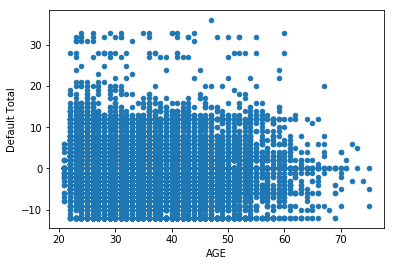

In [611]:
Credit_Data.plot(kind='scatter',x='AGE',y='Default Total')

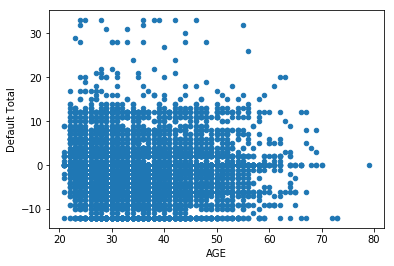

In [612]:
Credit_Data_Test.plot(kind='scatter',x='AGE',y='Default Total')

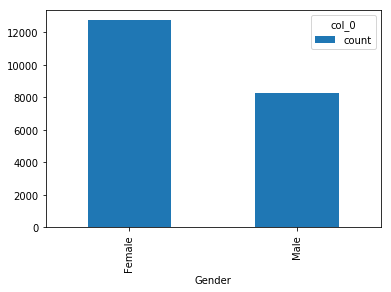

In [613]:
pd.crosstab(Credit_Data['Gender'],columns='count').plot(kind='bar')

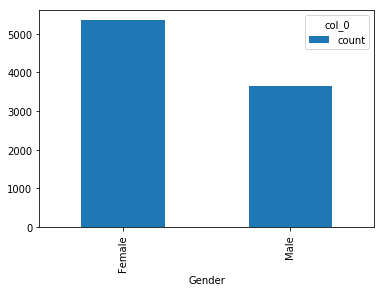

In [614]:
pd.crosstab(Credit_Data_Test['Gender'],columns='count').plot(kind='bar')

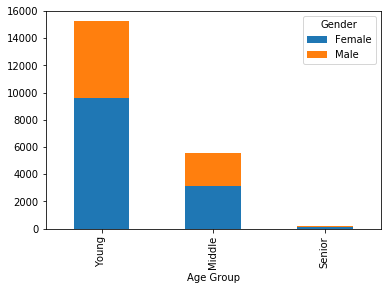

In [615]:
pd.crosstab(Credit_Data['Age Group'],Credit_Data['Gender']).plot(kind='bar',stacked=True)

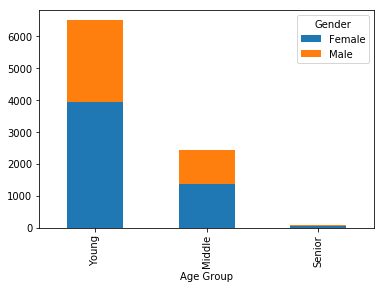

In [616]:
pd.crosstab(Credit_Data_Test['Age Group'],Credit_Data_Test['Gender']).plot(kind='bar',stacked=True)

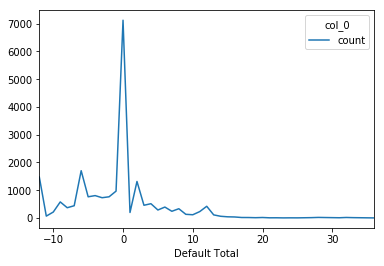

In [617]:
pd.crosstab(Credit_Data['Default Total'],columns='count').plot(kind='line')

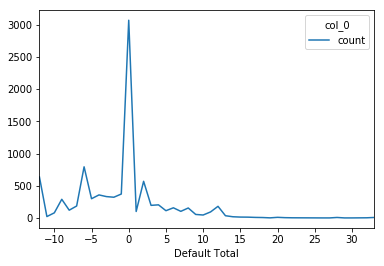

In [618]:
pd.crosstab(Credit_Data_Test['Default Total'],columns='count').plot(kind='line')

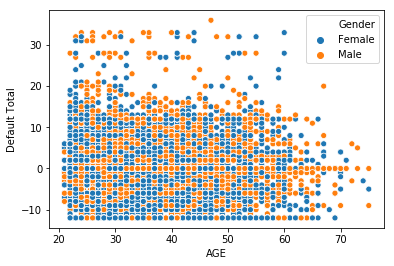

In [619]:
sns.scatterplot(x='AGE',y='Default Total',data = Credit_Data, hue = 'Gender')

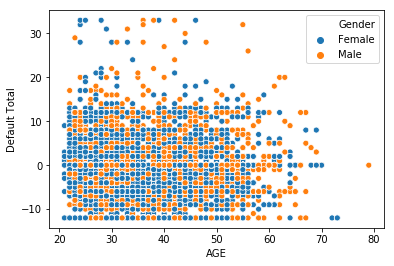

In [620]:
sns.scatterplot(x='AGE',y='Default Total',data = Credit_Data_Test, hue = 'Gender')

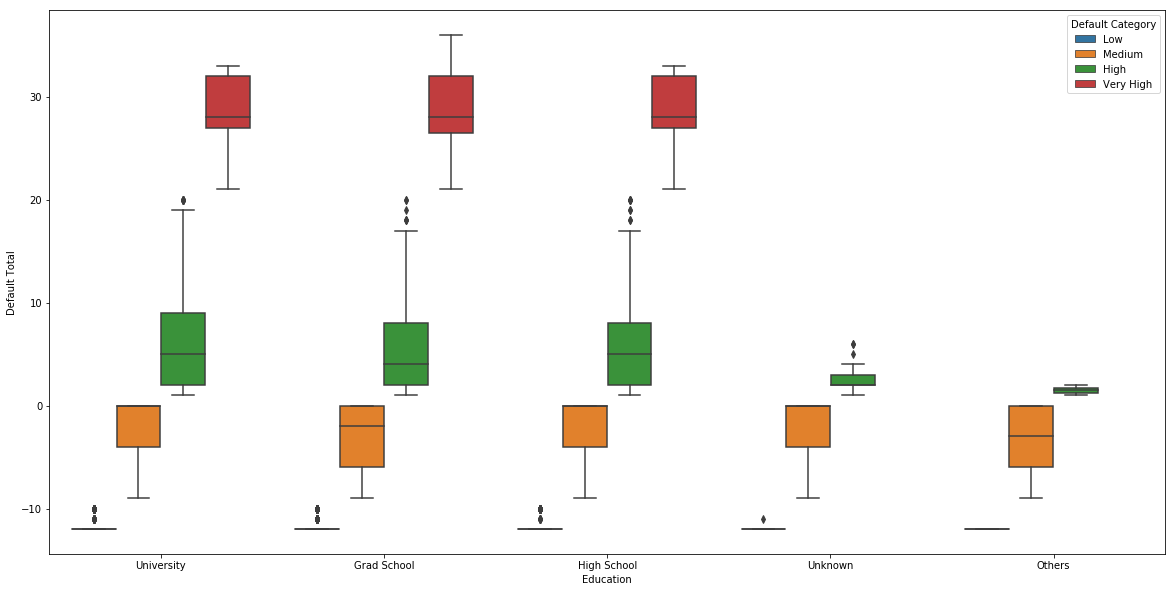

In [621]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Education',y='Default Total',data = Credit_Data,hue = 'Default Category')

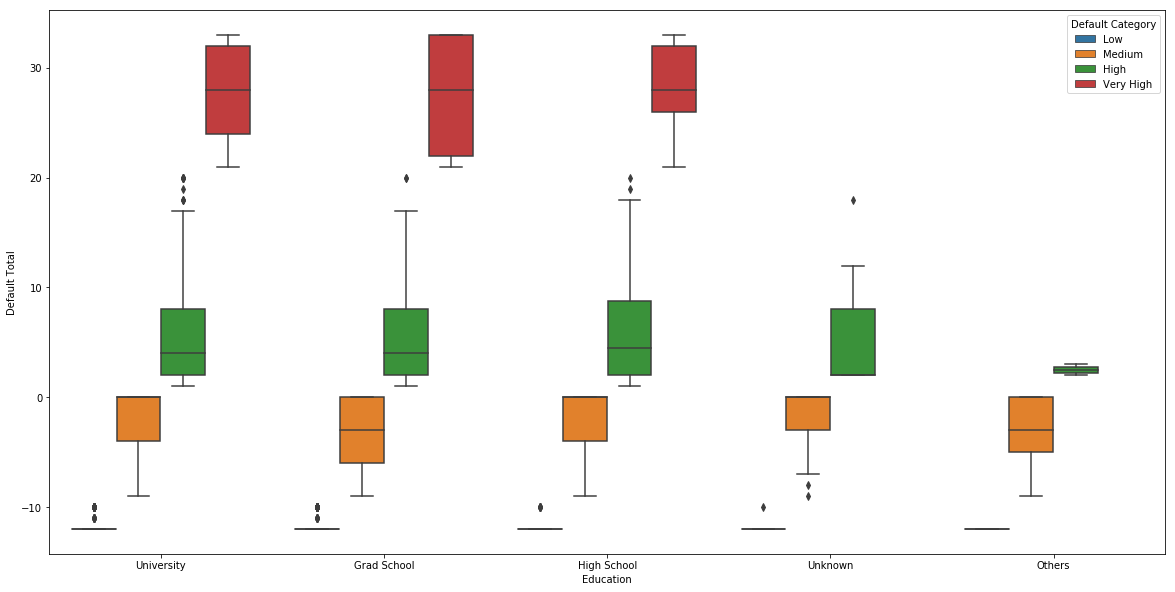

In [622]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Education',y='Default Total',data = Credit_Data_Test,hue = 'Default Category')

In [713]:
Credit_Data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Default Total,BILL_AMT,PAY_AMT
LIMIT_BAL,1.000000,0.029683,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,...,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163,-0.319149,0.306326,0.341180
SEX,0.029683,1.000000,0.011012,-0.033930,-0.092907,-0.061232,-0.072602,-0.064406,-0.061242,-0.055920,...,0.003907,0.000398,-0.003920,0.000042,0.002165,0.003759,-0.037634,-0.071145,-0.023462,0.001746
EDUCATION,-0.216762,0.011012,1.000000,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,0.094702,...,-0.042164,-0.032573,-0.045854,-0.041620,-0.035620,-0.031098,0.021347,0.121056,0.011121,-0.064207
MARRIAGE,-0.110451,-0.033930,-0.143085,1.000000,-0.414239,0.029420,0.032403,0.043988,0.042245,0.044779,...,-0.002227,-0.006634,0.000018,-0.014061,-0.003375,-0.005555,-0.016888,0.046512,-0.026297,-0.009023
AGE,0.143206,-0.092907,0.172253,-0.414239,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,-0.061018,...,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664,-0.064373,0.054074,0.039802
PAY_0,-0.272059,-0.061232,0.105815,0.029420,-0.043313,1.000000,0.669158,0.573421,0.540895,0.506958,...,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851,0.739295,0.186945,-0.121543
PAY_2,-0.297323,-0.072602,0.119132,0.032403,-0.055090,0.669158,1.000000,0.768036,0.662055,0.621775,...,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546,0.848865,0.233053,-0.098070
PAY_3,-0.290059,-0.064406,0.110223,0.043988,-0.058891,0.573421,0.768036,1.000000,0.780378,0.692843,...,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930,0.880033,0.232667,-0.073452
PAY_4,-0.269652,-0.061242,0.103607,0.042245,-0.057324,0.540895,0.662055,0.780378,1.000000,0.826037,...,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079,0.893508,0.241144,-0.052823
PAY_5,-0.253399,-0.055920,0.094702,0.044779,-0.061018,0.506958,0.621775,0.692843,0.826037,1.000000,...,-0.009026,-0.003200,0.005019,-0.060878,-0.032454,-0.027342,0.208783,0.879264,0.251076,-0.033074


In [623]:
Credit_Data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
Age Group                     0
Default Total                 0
BILL_AMT                      0
PAY_AMT                       0
Default Category              0
Gender                        0
Marrital Status               0
Educatio

In [624]:
Credit_Data_Test.isnull().sum()

LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAY_0               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
Age Group           0
Default Total       0
BILL_AMT            0
PAY_AMT             0
Default Category    0
Gender              0
Marrital Status     0
Education           0
dtype: int64

In [625]:
Credit_Data.dtypes

LIMIT_BAL                        int64
SEX                              int64
EDUCATION                        int64
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default_payment_next_month       int64
Age Group                     category
Default Total            

In [626]:
Credit_Data_Test.dtypes

LIMIT_BAL              int64
SEX                    int64
EDUCATION              int64
MARRIAGE               int64
AGE                    int64
PAY_0                  int64
PAY_2                  int64
PAY_3                  int64
PAY_4                  int64
PAY_5                  int64
PAY_6                  int64
BILL_AMT1              int64
BILL_AMT2              int64
BILL_AMT3              int64
BILL_AMT4              int64
BILL_AMT5              int64
BILL_AMT6              int64
PAY_AMT1               int64
PAY_AMT2               int64
PAY_AMT3               int64
PAY_AMT4               int64
PAY_AMT5               int64
PAY_AMT6               int64
Age Group           category
Default Total          int64
BILL_AMT               int64
PAY_AMT                int64
Default Category    category
Gender                object
Marrital Status       object
Education             object
dtype: object

In [627]:
Credit_Data_Final=Credit_Data.drop(['SEX','EDUCATION','MARRIAGE','AGE'],axis=1)
Credit_Data_Final.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT6,default_payment_next_month,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status,Education
0,360000,-1,-1,-1,-1,-1,-1,20952,12590,3479,...,27043,0,Young,-6,51346,57448,Medium,Female,Single,University
1,240000,2,2,-2,-1,0,-1,456,0,0,...,3074,0,Middle,0,6644,7581,Medium,Female,Single,Grad School
2,320000,0,0,0,0,0,0,49846,53811,38717,...,1500,0,Middle,0,248758,16500,Medium,Female,Married,University
3,50000,-1,-1,-2,-2,-2,-2,2675,0,0,...,0,1,Young,-10,2675,0,Low,Female,Single,University
4,80000,-1,0,0,0,0,0,35861,18521,19385,...,1449,0,Middle,-1,137046,7853,Medium,Male,Married,High School


In [628]:
Credit_Data_Test_Final=Credit_Data_Test.drop(['SEX','EDUCATION','MARRIAGE','AGE'],axis=1)
Credit_Data_Test_Final.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT5,PAY_AMT6,Age Group,Default Total,BILL_AMT,PAY_AMT,Default Category,Gender,Marrital Status,Education
0,60000,0,0,0,0,0,0,36082,37127,38117,...,1520,1205,Young,0,228411,8749,Medium,Female,Married,University
1,200000,0,0,0,0,2,0,61099,64160,76593,...,5739,12050,Young,2,356642,56692,High,Female,Single,Grad School
2,230000,0,0,0,0,-2,-2,38395,39943,20650,...,0,0,Young,-4,98988,4500,Medium,Male,Single,Grad School
3,150000,0,0,0,0,0,0,152175,148872,145978,...,6500,7200,Young,0,876433,35145,Medium,Male,Single,Grad School
4,140000,0,0,0,0,0,0,80210,67746,76230,...,5000,3000,Young,0,462941,34653,Medium,Male,Single,University


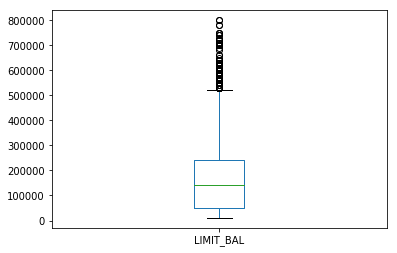

In [629]:
Credit_Data_Final['LIMIT_BAL'].plot(kind='box')

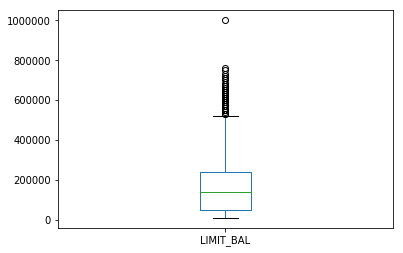

In [630]:
Credit_Data_Test_Final['LIMIT_BAL'].plot(kind='box')

In [631]:
np.percentile(Credit_Data_Final['LIMIT_BAL'],99.5)

530000.0

In [632]:
(Credit_Data_Final['LIMIT_BAL']>np.percentile(Credit_Data_Final['LIMIT_BAL'],99.5)).value_counts(normalize=True)*100

False    99.509524
True      0.490476
Name: LIMIT_BAL, dtype: float64

In [633]:
np.mean(Credit_Data_Final['LIMIT_BAL'])+3*np.std(Credit_Data_Final['LIMIT_BAL'])

554101.1002034575

# Cube Root Transformations

In [634]:
Credit_Data_Final['PAY_AMT_LOG']=Credit_Data_Final['PAY_AMT']**(1/3)

In [635]:
Credit_Data_Test_Final['PAY_AMT_LOG']=Credit_Data_Test_Final['PAY_AMT']**(1/3)

In [636]:
Credit_Data_Final['BILL_AMT_LOG']=Credit_Data_Final['BILL_AMT']**(1/3)

In [637]:
Credit_Data_Test_Final['BILL_AMT_LOG']=Credit_Data_Test_Final['BILL_AMT']**(1/3)

In [638]:
Credit_Data_Final['LIMIT_BAL_LOG']=Credit_Data_Final['LIMIT_BAL']**(1/3)

In [639]:
Credit_Data_Test_Final['LIMIT_BAL_LOG']=Credit_Data_Test_Final['LIMIT_BAL']**(1/3)

In [640]:
Credit_Data_Final['Default_Total_Log']=Credit_Data_Final['Default Total']**(1/3)

In [641]:
Credit_Data_Test_Final['Default_Total_Log']=Credit_Data_Test_Final['Default Total']**(1/3)

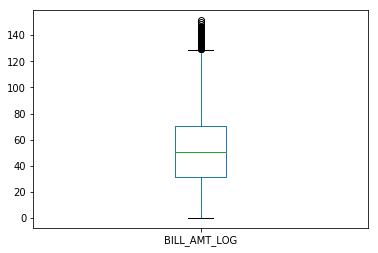

In [642]:
Credit_Data_Final['BILL_AMT_LOG'].plot(kind='box')

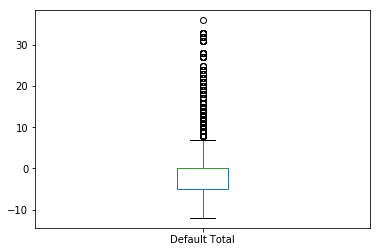

In [643]:
(Credit_Data_Final['Default Total']).plot(kind='box')

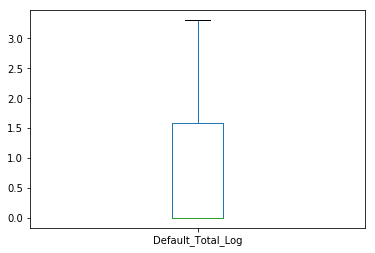

In [644]:
(Credit_Data_Final['Default_Total_Log']).plot(kind='box')

In [645]:
np.percentile((Credit_Data_Final['PAY_AMT_LOG']),99)

64.6126652900447

In [646]:
np.mean(Credit_Data_Final['PAY_AMT']**(1/3))+3*np.std(Credit_Data_Final['PAY_AMT']**(1/3))

63.73802203798358

In [647]:
(Credit_Data_Final['PAY_AMT_LOG']>51).value_counts()

False    20143
True       857
Name: PAY_AMT_LOG, dtype: int64

In [648]:
Credit_Data_Final['PAY_AMT_LOG'][Credit_Data_Final['PAY_AMT_LOG']>51]=Credit_Data_Final['PAY_AMT_LOG'].mean()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


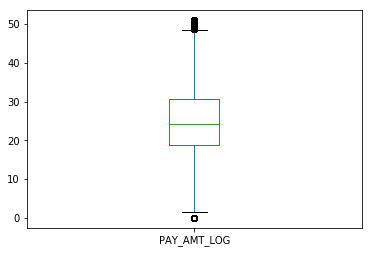

In [649]:
Credit_Data_Final['PAY_AMT_LOG'].plot(kind='box')

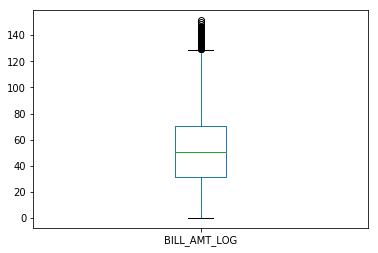

In [650]:
Credit_Data_Final['BILL_AMT_LOG'].plot(kind='box')

In [651]:
np.percentile((Credit_Data_Final['BILL_AMT_LOG']),99.5)

nan

In [652]:
(Credit_Data_Final['BILL_AMT_LOG']>128).value_counts()

False    20886
True       114
Name: BILL_AMT_LOG, dtype: int64

In [653]:
Credit_Data_Final['BILL_AMT_LOG'][Credit_Data_Final['BILL_AMT_LOG']>128]=Credit_Data_Final['BILL_AMT_LOG'].mean()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


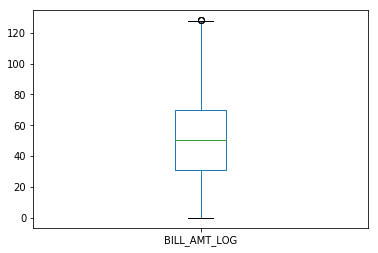

In [654]:
Credit_Data_Final['BILL_AMT_LOG'].plot(kind='box')

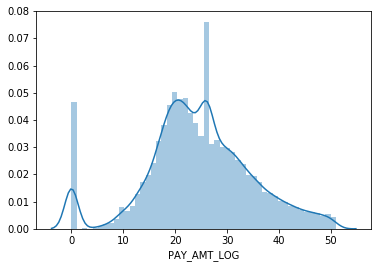

In [655]:
sns.distplot(Credit_Data_Final['PAY_AMT_LOG'])

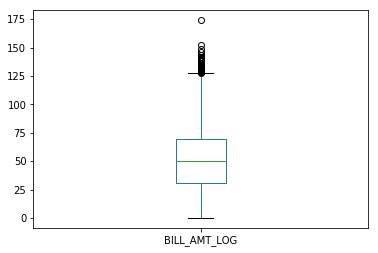

In [656]:
Credit_Data_Test_Final['BILL_AMT_LOG'].plot(kind='box')

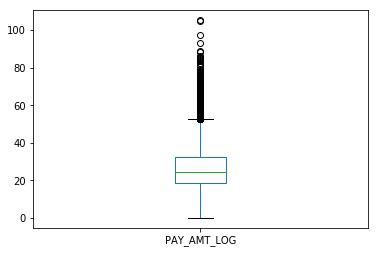

In [657]:
Credit_Data_Test_Final['PAY_AMT_LOG'].plot(kind='box')

In [712]:
np.percentile((Credit_Data_Test_Final['BILL_AMT_LOG']),99.4)

128.383894693383

In [659]:
(Credit_Data_Test_Final['BILL_AMT_LOG']>128).value_counts()

False    8945
True       55
Name: BILL_AMT_LOG, dtype: int64

In [660]:
Credit_Data_Test_Final['BILL_AMT_LOG'].loc[Credit_Data_Test_Final['BILL_AMT_LOG']>128]=Credit_Data_Test_Final['BILL_AMT_LOG'].mean()

In [661]:
np.percentile((Credit_Data_Test_Final['PAY_AMT_LOG']),99)

64.69047499748318

In [662]:
(Credit_Data_Test_Final['PAY_AMT_LOG']>47.5).value_counts()

False    8472
True      528
Name: PAY_AMT_LOG, dtype: int64

In [663]:
Credit_Data_Test_Final['PAY_AMT_LOG'].loc[Credit_Data_Test_Final['PAY_AMT_LOG']>47.5]=Credit_Data_Test_Final['PAY_AMT_LOG'].mean()

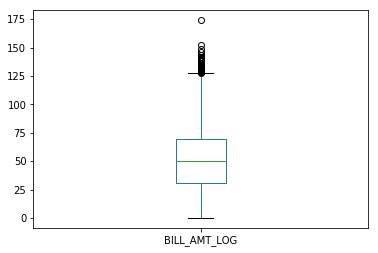

In [664]:
Credit_Data_Test_Final['BILL_AMT_LOG'].plot(kind='box')

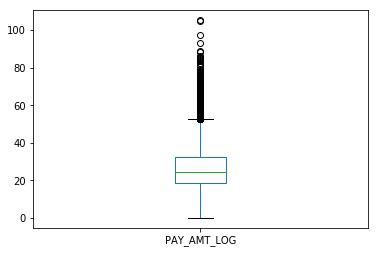

In [665]:
Credit_Data_Test_Final['PAY_AMT_LOG'].plot(kind='box')

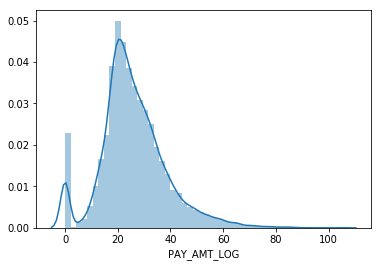

In [666]:
sns.distplot(Credit_Data_Test_Final['PAY_AMT_LOG'])

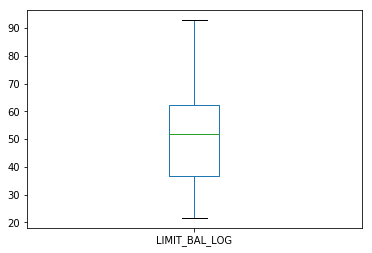

In [667]:
Credit_Data_Final['LIMIT_BAL_LOG'].plot(kind='box')

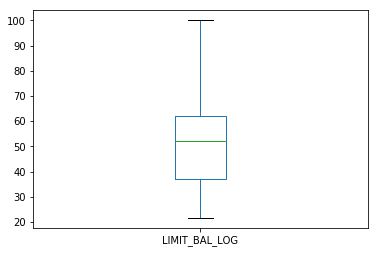

In [668]:
Credit_Data_Test_Final['LIMIT_BAL_LOG'].plot(kind='box')

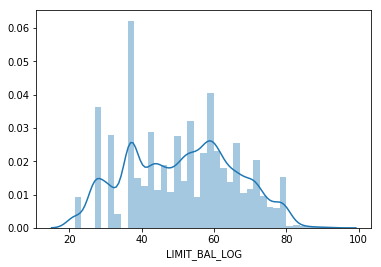

In [669]:
sns.distplot(Credit_Data_Final['LIMIT_BAL_LOG'])

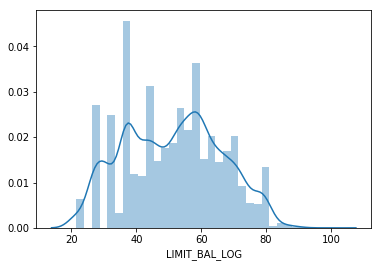

In [670]:
sns.distplot(Credit_Data_Test_Final['LIMIT_BAL_LOG'])

In [671]:
Credit_Data_Final.drop(['LIMIT_BAL','BILL_AMT','PAY_AMT','Default Total'],axis=1,inplace=True)

In [672]:
Credit_Data_Test_Final.drop(['LIMIT_BAL','BILL_AMT','PAY_AMT','Default Total'],axis=1,inplace=True)

In [673]:
Credit_Data_Final['BILL_AMT_LOG']=Credit_Data_Final['BILL_AMT_LOG'].fillna(0)

In [674]:
Credit_Data_Test_Final['BILL_AMT_LOG']=Credit_Data_Test_Final['BILL_AMT_LOG'].fillna(0)

In [691]:
Credit_Data_Final['Default_Total_Log']=Credit_Data_Final['Default_Total_Log'].fillna(0)

In [692]:
Credit_Data_Test_Final['Default_Total_Log']=Credit_Data_Test_Final['Default_Total_Log'].fillna(0)

In [693]:
Credit_Data_Test_Final.isnull().sum()

PAY_0                0
PAY_2                0
PAY_3                0
PAY_4                0
PAY_5                0
PAY_6                0
BILL_AMT1            0
BILL_AMT2            0
BILL_AMT3            0
BILL_AMT4            0
BILL_AMT5            0
BILL_AMT6            0
PAY_AMT1             0
PAY_AMT2             0
PAY_AMT3             0
PAY_AMT4             0
PAY_AMT5             0
PAY_AMT6             0
Age Group            0
Default Category     0
Gender               0
Marrital Status      0
Education            0
PAY_AMT_LOG          0
BILL_AMT_LOG         0
LIMIT_BAL_LOG        0
Default_Total_Log    0
dtype: int64

# Splitting Categorical and Numerical Data for Model Building

In [694]:
Credit_Data_Cat=Credit_Data_Final[Credit_Data_Final.select_dtypes(include='object').columns.tolist()]
Credit_Data_Cat.head()

,Gender,Marrital Status,Education
0,Female,Single,University
1,Female,Single,Grad School
2,Female,Married,University
3,Female,Single,University
4,Male,Married,High School


In [695]:
Credit_Data_Test_Cat=Credit_Data_Test_Final[Credit_Data_Test_Final.select_dtypes(include='object').columns.tolist()]
Credit_Data_Test_Cat.head()

,Gender,Marrital Status,Education
0,Female,Married,University
1,Female,Single,Grad School
2,Male,Single,Grad School
3,Male,Single,Grad School
4,Male,Single,University


In [696]:
Credit_Data_Num=Credit_Data_Final[Credit_Data_Final.select_dtypes(include=[np.number]).columns.tolist()]
Credit_Data_Num.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY_AMT_LOG,BILL_AMT_LOG,LIMIT_BAL_LOG,Default_Total_Log
0,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,...,3479,3446,8870,2020,27043,0,38.585575,37.167973,71.137866,0.0
1,2,2,-2,-1,0,-1,456,0,0,2240,...,0,2240,0,2267,3074,0,19.644554,18.799366,62.144650,0.0
2,0,0,0,0,0,0,49846,53811,38717,35409,...,2000,2000,3000,3000,1500,0,25.458217,62.891558,68.399038,0.0
3,-1,-1,-2,-2,-2,-2,2675,0,0,0,...,0,0,0,0,0,1,0.000000,13.881655,36.840315,0.0
4,-1,0,0,0,0,0,35861,18521,19385,20561,...,1500,1500,1028,876,1449,0,19.876742,51.557136,43.088694,0.0


In [697]:
Credit_Data_Test_Num=Credit_Data_Test_Final[Credit_Data_Test_Final.select_dtypes(include=[np.number]).columns.tolist()]
Credit_Data_Test_Num.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AMT_LOG,BILL_AMT_LOG,LIMIT_BAL_LOG,Default_Total_Log
0,0,0,0,0,0,0,36082,37127,38117,38874,...,1628,1618,1375,1403,1520,1205,20.605641,61.127834,39.148676,0.000000
1,0,0,0,0,2,0,61099,64160,76593,93988,...,4160,14593,20150,0,5739,12050,38.415568,70.915989,58.480355,1.259921
2,0,0,0,0,-2,-2,38395,39943,20650,0,...,2500,2000,0,0,0,0,16.509636,46.258781,61.269257,0.000000
3,0,0,0,0,0,0,152175,148872,145978,139791,...,5800,5245,5200,5200,6500,7200,32.755773,95.698745,53.132928,0.000000
4,0,0,0,0,0,0,80210,67746,76230,77954,...,10000,10000,3393,3260,5000,3000,32.602203,77.358591,51.924941,0.000000


In [698]:
Credit_Data_Cat_dummies = pd.get_dummies(Credit_Data_Cat)
Credit_Data_Cat_dummies.head()

,Gender_Female,Gender_Male,Marrital Status_Divorced,Marrital Status_Married,Marrital Status_Single,Marrital Status_Widow,Education_Grad School,Education_High School,Education_Others,Education_University,Education_Unknown
0,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,0,0


In [699]:
Credit_Data_Test_Cat_dummies = pd.get_dummies(Credit_Data_Test_Cat)
Credit_Data_Test_Cat_dummies.head()

,Gender_Female,Gender_Male,Marrital Status_Divorced,Marrital Status_Married,Marrital Status_Single,Marrital Status_Widow,Education_Grad School,Education_High School,Education_Others,Education_University,Education_Unknown
0,1,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0


In [700]:
Credit_Data_Cat_Num=pd.concat([Credit_Data_Num,Credit_Data_Cat_dummies],axis=1)
Credit_Data_Cat_Num.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,Gender_Male,Marrital Status_Divorced,Marrital Status_Married,Marrital Status_Single,Marrital Status_Widow,Education_Grad School,Education_High School,Education_Others,Education_University,Education_Unknown
0,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,...,0,0,0,1,0,0,0,0,1,0
1,2,2,-2,-1,0,-1,456,0,0,2240,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,49846,53811,38717,35409,...,0,0,1,0,0,0,0,0,1,0
3,-1,-1,-2,-2,-2,-2,2675,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-1,0,0,0,0,0,35861,18521,19385,20561,...,1,0,1,0,0,0,1,0,0,0


In [701]:
Credit_Data_Test_Cat_Num=pd.concat([Credit_Data_Test_Num,Credit_Data_Test_Cat_dummies],axis=1)
Credit_Data_Test_Cat_Num.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,Gender_Male,Marrital Status_Divorced,Marrital Status_Married,Marrital Status_Single,Marrital Status_Widow,Education_Grad School,Education_High School,Education_Others,Education_University,Education_Unknown
0,0,0,0,0,0,0,36082,37127,38117,38874,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,2,0,61099,64160,76593,93988,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,-2,-2,38395,39943,20650,0,...,1,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,152175,148872,145978,139791,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,80210,67746,76230,77954,...,1,0,0,1,0,0,0,0,1,0


In [702]:
Credit_Data_Cat_Num_Dep=Credit_Data_Cat_Num['default_payment_next_month']
Credit_Data_Cat_Num_Dep.head()

0    0
1    0
2    0
3    1
4    0
Name: default_payment_next_month, dtype: int64

In [703]:
Credit_Data_Cat_Num_Indep=Credit_Data_Cat_Num.drop(['default_payment_next_month'],axis=1)
Credit_Data_Cat_Num_Indep.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,Gender_Male,Marrital Status_Divorced,Marrital Status_Married,Marrital Status_Single,Marrital Status_Widow,Education_Grad School,Education_High School,Education_Others,Education_University,Education_Unknown
0,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,...,0,0,0,1,0,0,0,0,1,0
1,2,2,-2,-1,0,-1,456,0,0,2240,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,49846,53811,38717,35409,...,0,0,1,0,0,0,0,0,1,0
3,-1,-1,-2,-2,-2,-2,2675,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-1,0,0,0,0,0,35861,18521,19385,20561,...,1,0,1,0,0,0,1,0,0,0


# Splitting the data in Training & Test Set

In [704]:
x_train, x_test, y_train, y_test = train_test_split(Credit_Data_Cat_Num_Indep,Credit_Data_Cat_Num_Dep,train_size=0.7,random_state=100)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Logistic Regression

In [705]:
lr=LogisticRegression()

In [706]:
pipe=Pipeline([('classifier',LogisticRegression())])

# Grid Search CV

In [707]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}  
]
clf = GridSearchCV(pipe,param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1)

In [708]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_st...914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'classifier__solver': ['liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

# Predicting the Model with Training Set

In [709]:
y_pred=clf.predict(x_test)

# Checking Model Performance

In [710]:
accuracy = accuracy_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print("Accuracy is",accuracy)
print("ROC AUC is",roc_auc)

Accuracy is 0.8160609427075067
ROC AUC is 0.6472048537129301


# Predicting the Model with Testing Set

In [715]:
y_pred_test=clf.predict(Credit_Data_Test_Cat_Num)

# Submission

In [716]:
submit=pd.read_csv('F://Pratik//COVID Janata Hack\sample_submission_gm6gE0l.csv')
submit.head()

,ID,default_payment_next_month
0,10178,0
1,5304,0
2,5187,0
3,14495,0
4,20444,0


In [717]:
submit['default_payment_next_month']=y_pred_test

In [718]:
submit.to_csv('F://Pratik//COVID Janata Hack\Submit_20200324.csv',index=False)